In [2]:


import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report ,r2_score, mean_squared_error
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [3]:
df = pd.read_excel ("HW_Data_Set.xlsx", usecols = ['ind_37','ind_311','ind_239','ind_241','ind_18','ind_327','20_target'])
print (df)

       ind_18      ind_37   ind_239     ind_241    ind_311    ind_327  \
0      9.1100  184.819232  0.000217   99.736250  97.980028  12.056738   
1      9.2225  191.985663  0.000217   99.668519  97.932319  11.971831   
2      9.3125  197.993551  0.000217   99.627319  97.910664  11.888112   
3      9.4150  200.370912  0.000217   99.567128  97.870334  11.805556   
4      9.8925  223.561880  0.000217   99.380024  97.705214  11.724138   
...       ...         ...       ...         ...        ...        ...   
6162  16.2175  102.453252  0.000013  100.965196  98.839946  14.583333   
6163  16.1175   96.780546  0.000013  100.960612  98.837255  14.285714   
6164  16.3125  108.218518  0.000013  100.885130  98.765154  14.000000   
6165  16.4200  124.933707  0.000013  100.783022  98.666984  13.725490   
6166  16.4500  123.289457  0.000013  100.824169  98.709061  13.461538   

      20_target  
0     15.135802  
1     15.143348  
2     15.146870  
3     15.153283  
4    -15.179065  
...         ...

# 1-) Decision Tree

In [4]:
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import numpy as np

In [5]:
X = df.drop('20_target', 1)
y =df['20_target']

X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.3, random_state=42, shuffle=False)

In [7]:
cart = tree.DecisionTreeRegressor()
cart_model = cart.fit(X_train,y_train)
cart_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [9]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

19.906770193080234

In [10]:
cart_grdi = {"criterion" : ['mse', 'friedman_mse'],
            "max_depth": range(1,25),
            "min_samples_split": list(range(15,30))}

cart_model = tree.DecisionTreeRegressor()

cart_cv = GridSearchCV(cart_model, cart_grdi, cv=10, n_jobs=-1, verbose=2)
#Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model.
#
cart_cv_model = cart_cv.fit(X_train,y_train)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 1316 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 2448 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 3908 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 5688 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  3.1min finished


In [ ]:
df.head()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [ ]:
X = df.drop('20_target', 1)
y =df['20_target']

X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.3, random_state=42, shuffle=False)



In [11]:


print("En iyi parametlerler: " + str(cart_cv_model.best_params_))



En iyi parametlerler: {'criterion': 'friedman_mse', 'max_depth': 1, 'min_samples_split': 15}


In [7]:
cart_t = tree.DecisionTreeRegressor(criterion='mse', max_depth=1, min_samples_split=15)
cart_tune = cart_t.fit(X_train,y_train)
y_pred = cart_tune.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))








14.48552735355513

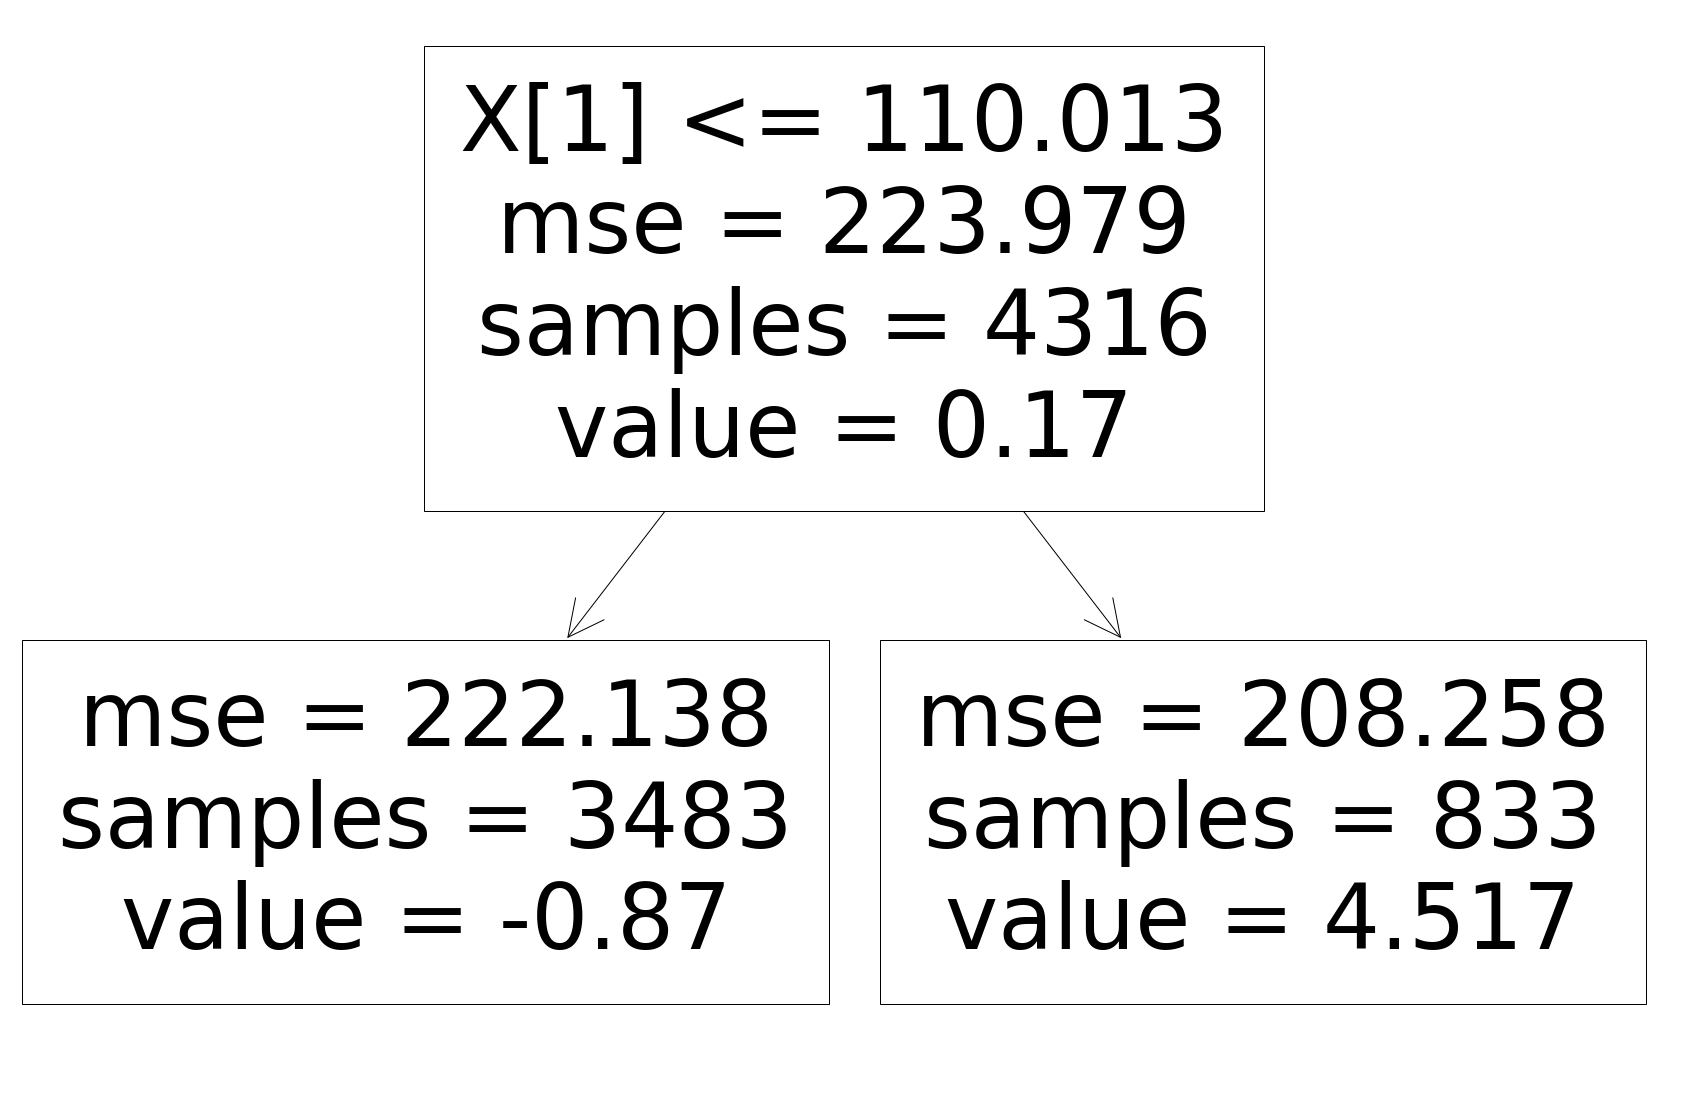

In [10]:
plt.figure(figsize=(30,20))
tree.plot_tree(cart_tune);



# RESULTS BEFORE  THE TUNE


In [10]:
modeller = [
    cart_model,
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)     
    dogruluk = np.sqrt(mean_squared_error(y_test,y_pred))
    print("-"*28)
    print(isimler + ":" )
    print("mean_squared_error:", dogruluk)


----------------------------
DecisionTreeRegressor:
mean_squared_error: 19.896102638543713


# RESULTS AFTER THE TUNE


In [8]:
modeller = [
   cart_tune
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)     
    dogruluk = np.sqrt(mean_squared_error(y_test,y_pred))
    print("-"*28)
    print(isimler + ":" )
    print("mean_squared_error:", dogruluk)

----------------------------
DecisionTreeRegressor:
mean_squared_error: 14.48552735355513
